In [23]:
import pandas as pd
import chardet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [7]:
data['v2'] = data['v2'].str.lower().str.replace('[^\w\s]', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kanna\AppData\Local\Temp\ipykernel_27096\76744719.py:1: SyntaxWarning: invalid escape sequence '\w'
  data['v2'] = data['v2'].str.lower().str.replace('[^\w\s]', '', regex=True)


In [9]:
X = data['v2']
y = data['v1'].map({'ham': 0, 'spam': 1})

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=50),
    'Support Vector Machine': SVC(kernel='linear', probability=True)
}


In [17]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.9605381165919282

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Logistic Regression Accuracy: 0.968609865470852

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Support Vector Machine Accuracy: 0.9838565022421525

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.98

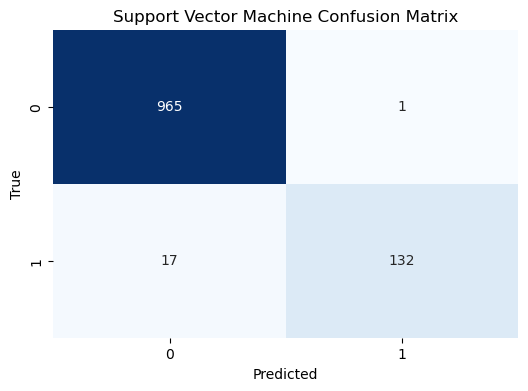

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}
